# Lab 5 - Spatial Analysis in Python, Part 2
## GIS 3 - Week 6
### Marcos Falcone

In this notebook, I will show two examples of expanded, annotated and discussed code from the Geopandas/Geoprocessing and the Geovisualization Tutorials.<sup>1</sup>

First of all, I had to import the packages that I intended to use for this lab.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

Then, I ran some lines of code with little modifications since they were needed to get to the point where I wanted to make changes.

In [7]:
tracts_df = gpd.read_file('data/clinics.shp')
routes_df = gpd.read_file('data/Truck_Route_Network.shp') #reading needed shapefiles

r = routes_df['geometry']

rc_routes = r[r.apply(lambda x: x.intersects(county.iloc[0]['geometry']))] #using lambdas to check for intersections

geoms = []
for idx, route in enumerate(rc_routes):
    print(idx)
    geoms.append(route.intersection(county.iloc[0]['geometry'])) #testing route segments for intersection with Riverdale county, and appending the segment to a list
    
rc_hw = gpd.GeoSeries(geoms) #turning list into a geoseries

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


The following is expanded code from the Geopandas Geoprocessing lab. I chose this example because, among others, it allowed me to show an extremely simple way to 'dissolve' boundaries without actually doing it, i.e. for visualization purposes. More specifically, I set the edgecolor of tracts to 'none' instead of dissolving them -if I only needed to visualize this information, proceeding in this way would prevent me from creating a new dataframe and save me space as well as processing power.

All changes are annotated below:

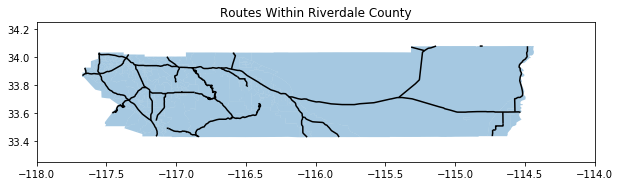

In [8]:
plt.rcParams['figure.figsize'] = (10, 10) #modifying figure size
ax = plt.gca()
tracts_df.plot(ax=ax, edgecolor='none', alpha=0.4) #setting edgecolor to 'none', changed transparency level
rc_hw.plot(ax=ax, edgecolor='k')
ax.set_xlim(-118.0, -114.0); ax.set_ylim(33.25, 34.25)
ax.set_aspect('equal')
plt.title("Routes Within Riverdale County") #adding a title
plt.show()

The following is expanded code from the Geovisualization lab. I chose this example because it allowed me to add several items which were not initally present but could be useful (such as titles and labels) as well as other elements which depending on the goals of the visualization could also be helpful (such as a grid or coordinates).

All changes are annotated below:

In [9]:
shp_link = 'data/texas.shp'
gdf = gpd.read_file(shp_link) #loading the Texas shapefile I needed

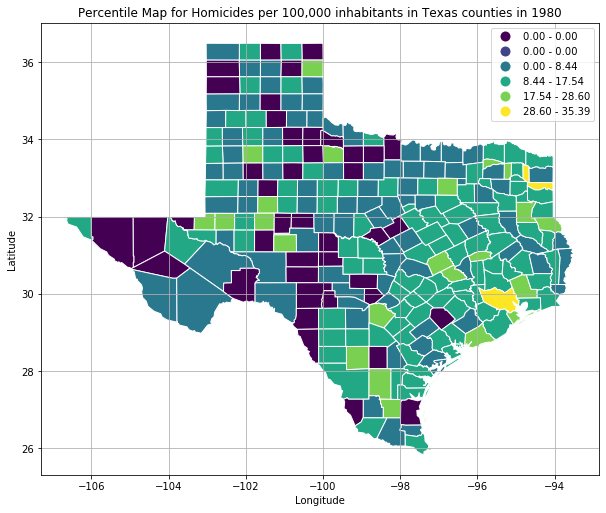

In [10]:
f, ax = plt.subplots(1, figsize=(10, 10)) #increasing figure size
gdf.plot(column='HR80', scheme='PERCENTILES', ax=ax,
        edgecolor='white', legend=True) #changing the variable as well as the scheme
plt.xlabel('Longitude')
plt.ylabel('Latitude') #putting the map into latitude/longitude context
plt.grid(True) #adding a grid
plt.title("Percentile Map for Homicides per 100,000 inhabitants in Texas counties in 1980") #adding a title
plt.show()

**Footnotes:**

1 - Starting at line 27, the last part of the 230_geovisualization notebook did not compile for me.